In [1]:
import moviepy.editor as moviepy 
import glob 
import os 
import pandas as pd 
import numpy as np
import scipy 

In [2]:
train_dir = os.path.join('..', 'data', 'train')
val_dir = os.path.join('..', 'data', 'validation')

train_vids = glob.glob(train_dir+'\*mkv')
val_vids = glob.glob(val_dir+'\*mkv')

train_labels = glob.glob(train_dir+'\*csv')
val_labels = glob.glob(val_dir+'\*csv')

Here I save all the video frames to .PNGs for easier mainipulation and compatibility with Keras. I use the image name as an ID to correspond to the video name, frame number, and steering value (all for identification during training). 

In [4]:
def frame2png(vid_fies, label_files, setting):
    ''' convert video frames to PNGs and save in data folder '''
    
    print ('{} data --processing... '.format(setting))
    for j in range(len(vid_fies)):
        #for debugging 
        file_name = vid_fies[j].split('.')[0].split('\\')[-1]

        #grab the data
        video = moviepy.VideoFileClip(vid_fies[j])
        labels = pd.read_csv(label_files[j])

        #how many frames 
        fps, duration = video.fps, video.duration

        for i in range(int(duration*fps)): 
            try: 
                num = int(labels.iloc[i]['frame'])
                wheel = int(labels.iloc[i]['wheel']*10)

                time = i/fps
                frame = video.get_frame(time)
                resize = scipy.misc.imresize(frame, 25)

                unique_name = '{}_{}_{}{}'.format(str(file_name), str(num), str(wheel), '.png')

                savename = os.path.join('data', setting, 'images', unique_name)
                scipy.misc.imsave(savename, resize)

            except IndexError:
                print ('video {} frame {} value does not exist'.format(file_name, i))


In [4]:
frame2png(train_vids, train_labels, 'train')
frame2png(val_vids, val_labels, 'validation')

train data --processing... 
video epoch01_front frame 1500 value does not exist
video epoch01_front frame 1501 value does not exist
video epoch02_front frame 3900 value does not exist
video epoch02_front frame 3901 value does not exist
video epoch03_front frame 2700 value does not exist
video epoch03_front frame 2701 value does not exist
video epoch04_front frame 2700 value does not exist
video epoch04_front frame 2701 value does not exist
video epoch05_front frame 2700 value does not exist
video epoch05_front frame 2701 value does not exist
video epoch06_front frame 2700 value does not exist
video epoch06_front frame 2701 value does not exist
video epoch07_front frame 2700 value does not exist
video epoch07_front frame 2701 value does not exist
validation data --processing... 
video epoch08_front frame 2700 value does not exist
video epoch08_front frame 2701 value does not exist
video epoch09_front frame 2700 value does not exist
video epoch09_front frame 2701 value does not exist
vid

Stack all the CSVs (labels) into one, just in case we need that later for checking our results.

In [5]:
def stack_csvs(labels_file, setting):
    '''concatenate labels into single CSV, format for image IDs'''
    print ('{} data --processing... '.format(setting))
    
    def f(row):

        frame = str(int(row['frame']))
        name = row['new_index'].split('.')[0].split('\\')[-1]
        return '{}_{}'.format(name, frame)

    dfs = []
    for csv in labels_file: 
        labels = pd.read_csv(csv)
        labels['new_index'] = csv
        labels['new_index'] = labels.apply(f, axis=1)
        dfs.append(labels)
    
    savename = os.path.join('data', setting, 'labels.csv')
    new_df = pd.concat(dfs).reset_index(drop=True)
    new_df = new_df.set_index('new_index')

    new_df.to_csv(savename)

In [6]:
stack_csvs(train_labels, 'train')
stack_csvs(val_labels, 'validation')

train data --processing... 
validation data --processing... 


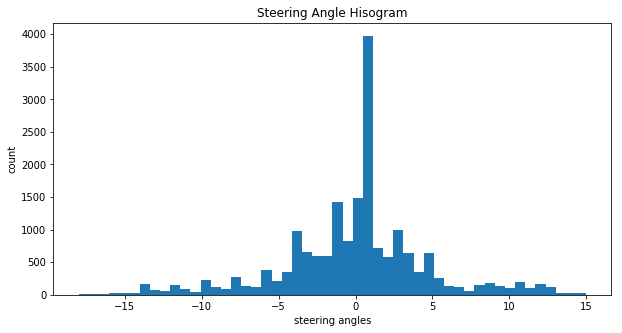

count    18900.000000
mean         0.498435
std          0.120949
min          0.050000
25%          0.437500
50%          0.512500
75%          0.550000
max          0.875000
Name: wheel, dtype: float64

In [3]:
import matplotlib.pyplot as plt

all_angles = pd.read_csv(train_labels[-1])['wheel']
all_angles * -1
plt.figure(figsize=(10, 5))
plt.title('Steering Angle Hisogram'); plt.xlabel('steering angles'); plt.ylabel('count')
plt.hist(all_angles, bins=50); plt.show()

all_angles = (all_angles + 20) / (20+20)
all_angles.describe()